In [ ]:
# import pandas library
import pandas as pd

In [2]:
# Let's read a this order details CSV file into a DataFrame
order_details = pd.read_csv('data/order_details.csv')

In [ ]:
# display the first few rows of the DataFrame
order_details.head()

,product_id,store_id,order_date,selling_price,customer_id,order_id
0,P0506,S0063,2025-01-01,4427,123564153,1111139641
1,P0061,S0084,2025-01-01,3125,123523135,1111134828
2,P0608,S0105,2025-01-01,2438,123528720,1111141728
3,P0470,S0031,2025-01-01,3887,123552589,1111122688
4,P0682,S0015,2025-01-01,4194,123457812,1111120360


In [4]:
# display summary information about the DataFrame
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74408 entries, 0 to 74407
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     74408 non-null  object
 1   store_id       74408 non-null  object
 2   order_date     74408 non-null  object
 3   selling_price  74408 non-null  int64 
 4   customer_id    74408 non-null  int64 
 5   order_id       74408 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 3.4+ MB



  - data looks like clean but we have to change `order_date` to datetime format

In [5]:
# check for missing values in the DataFrame
order_details.isnull().sum()

product_id       0
store_id         0
order_date       0
selling_price    0
customer_id      0
order_id         0
dtype: int64

- there is no null values

In [6]:
# check for duplicate rows in the DataFrame
order_details.duplicated().sum()

np.int64(0)

- there's no duplicate values

In [7]:
# Convert 'order_date' column to datetime format
order_details['order_date'] = pd.to_datetime(order_details['order_date'])

In [8]:
# Extract date components from 'order_date'

order_details['year'] = order_details['order_date'].dt.year
order_details['month'] = order_details['order_date'].dt.month
order_details['day'] = order_details['order_date'].dt.day
order_details['day_of_week'] = order_details['order_date'].dt.dayofweek
order_details['quarter'] = order_details['order_date'].dt.quarter
order_details['week_of_year'] = order_details['order_date'].dt.isocalendar().week
order_details.head()

,product_id,store_id,order_date,selling_price,customer_id,order_id,year,month,day,day_of_week,quarter,week_of_year
0,P0506,S0063,2025-01-01,4427,123564153,1111139641,2025,1,1,2,1,1
1,P0061,S0084,2025-01-01,3125,123523135,1111134828,2025,1,1,2,1,1
2,P0608,S0105,2025-01-01,2438,123528720,1111141728,2025,1,1,2,1,1
3,P0470,S0031,2025-01-01,3887,123552589,1111122688,2025,1,1,2,1,1
4,P0682,S0015,2025-01-01,4194,123457812,1111120360,2025,1,1,2,1,1


- create new columns for order_date so we can see the day,month etc sales and revalue

In [9]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74408 entries, 0 to 74407
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   product_id     74408 non-null  object        
 1   store_id       74408 non-null  object        
 2   order_date     74408 non-null  datetime64[ns]
 3   selling_price  74408 non-null  int64         
 4   customer_id    74408 non-null  int64         
 5   order_id       74408 non-null  int64         
 6   year           74408 non-null  int32         
 7   month          74408 non-null  int32         
 8   day            74408 non-null  int32         
 9   day_of_week    74408 non-null  int32         
 10  quarter        74408 non-null  int32         
 11  week_of_year   74408 non-null  UInt32        
dtypes: UInt32(1), datetime64[ns](1), int32(5), int64(3), object(2)
memory usage: 5.2+ MB


In [10]:
# Remove the original 'order_date' column if no longer needed
order_details.drop(['order_date'], axis=1, inplace=True)

In [11]:
# display statistical summary of numerical columns
order_details.describe().T

,count,mean,std,min,25%,50%,75%,max
selling_price,74408.0,2558.967194,1415.580516,100.0,1331.0,2566.0,3786.0,5000.0
customer_id,74408.0,123512365.140361,31993.187012,123456792.0,123484762.0,123512361.5,123539948.5,123567888.0
order_id,74408.0,1111149597.397068,22218.940812,1111111111.0,1111130340.75,1111149609.5,1111168844.25,1111188073.0
year,74408.0,2023.494947,1.117465,2022.0,2022.0,2023.0,2024.0,2025.0
month,74408.0,6.521785,3.455942,1.0,4.0,7.0,10.0,12.0
day,74408.0,15.720406,8.803821,1.0,8.0,16.0,23.0,31.0
day_of_week,74408.0,2.993227,1.999249,0.0,1.0,3.0,5.0,6.0
quarter,74408.0,2.507768,1.118639,1.0,2.0,3.0,4.0,4.0
week_of_year,74408.0,26.484491,15.088382,1.0,13.0,27.0,40.0,52.0


- Now , Let's work with another data set  `product_details`

In [12]:
# Now, let's read another CSV file into a DataFrame

product_details = pd.read_csv('data/product_details.csv')
product_details.head()

,product_id,product,brand,type,length,category,sub_category
0,P0000,serum,Livon,Indian & Exotic Herbs,5 x 20 x 12,Fruits & Vegetables,Herbs & Seasonings
1,P0001,hand wash - moisture Shield,Savlon,Hair Oil & Serum,13.5 x 22 x 20,Beauty & Hygiene,Hair Care
2,P0002,good day butter Cookies,Britannia,Hand Wash & Sanitizers,22 x 40 x 22,Beauty & Hygiene,Bath & Hand Wash
3,P0004,Happy Happy Choco-Chip Cookies,Parle,Cookies,2 x 13 x 4,Snacks & Branded Foods,Biscuits & Cookies
4,P0005,50-50 Timepass salted biscuits,Britannia,Glucose & Milk Biscuits,16 x 30 x 16,Snacks & Branded Foods,Biscuits & Cookies


In [13]:
# display summary information about the DataFrame
product_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3495 entries, 0 to 3494
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    3495 non-null   object
 1   product       3490 non-null   object
 2   brand         3490 non-null   object
 3   type          3495 non-null   object
 4   length        3415 non-null   object
 5   category      3495 non-null   object
 6   sub_category  3495 non-null   object
dtypes: object(7)
memory usage: 191.3+ KB


In [14]:
# check for missing values in the DataFrame
product_details.isnull().sum()

product_id       0
product          5
brand            5
type             0
length          80
category         0
sub_category     0
dtype: int64

- product, brand and length columns has missing values

In [15]:
# check for duplicate rows in the DataFrame
product_details.duplicated().sum()

np.int64(2796)

- product_details dataset has duplicated values


- Let's filter missing and duplicated values in this dataset

In [16]:
# display summary information about the DataFrame
product_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3495 entries, 0 to 3494
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    3495 non-null   object
 1   product       3490 non-null   object
 2   brand         3490 non-null   object
 3   type          3495 non-null   object
 4   length        3415 non-null   object
 5   category      3495 non-null   object
 6   sub_category  3495 non-null   object
dtypes: object(7)
memory usage: 191.3+ KB


In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
# fill missing values with the mode of the respective columns
product_details['product'].fillna(product_details['product'].mode()[0], inplace=True)
product_details['brand'].fillna(product_details['brand'].mode()[0], inplace=True)

In [21]:
# remove unnecessary 'length' column
product_details.drop('length', axis=1, inplace=True)

In [22]:
# remove duplicate rows from the DataFrame
product_details.drop_duplicates(inplace=True)

In [23]:
product_details.isnull().sum()

product_id      0
product         0
brand           0
type            0
category        0
sub_category    0
dtype: int64

- *`product_details datset has been filtered`*

In [ ]:
# Now, let's read another CSV file into a DataFrame

store_cities = pd.read_csv('data/store_cities.csv')
store_cities.head()

,store_id,storetype_id,store_szie,city_id,state_code,state,city
0,S0091,ST04,19 m²,C013,AR,Arkansas,Hot Springs National Park
1,S0012,ST04,28 m²,C005,TX,Texas,Huntsville
2,S0045,ST04,17 qm,C008,NC,North Carolina,Asheville
3,S0032,ST03,14 m²,C019,CA,California,Los Angeles
4,S0027,ST04,24 qm,C022,TX,Texas,Texarkana


In [25]:
# display summary information about the DataFrame
store_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   store_id      144 non-null    object
 1   storetype_id  144 non-null    object
 2   store_szie    144 non-null    object
 3   city_id       144 non-null    object
 4   state_code    144 non-null    object
 5   state         144 non-null    object
 6   city          144 non-null    object
dtypes: object(7)
memory usage: 8.0+ KB


In [26]:
# check for missing values in the DataFrame
store_cities.isnull().sum()

store_id        0
storetype_id    0
store_szie      0
city_id         0
state_code      0
state           0
city            0
dtype: int64

In [27]:
# check for duplicate rows in the DataFrame
store_cities.duplicated().sum()

np.int64(0)

### *`Lets merge these dataframes into a single dataframe for analysis`*

In [ ]:
# merge order_details and product_details on 'product_id'
merge_order_n_product = pd.merge(order_details, product_details, on='product_id', how='left')

In [29]:
merge_order_n_product.head()

,product_id,store_id,selling_price,customer_id,order_id,year,month,day,day_of_week,quarter,week_of_year,product,brand,type,category,sub_category
0,P0506,S0063,4427,123564153,1111139641,2025,1,1,2,1,1,Chakra Stainless Steel Scrub,Scotch brite,Blended Masalas,"Foodgrains, Oil & Masala",Masalas & Spices
1,P0061,S0084,3125,123523135,1111134828,2025,1,1,2,1,1,Jasmine Bloom Soap Bar,Lux,Bathing Bars & Soaps,Beauty & Hygiene,Bath & Hand Wash
2,P0608,S0105,2438,123528720,1111141728,2025,1,1,2,1,1,Milk Shake - Strawberry,Milky Mist,"Flavoured, Soya Milk","Bakery, Cakes & Dairy",Dairy
3,P0470,S0031,3887,123552589,1111122688,2025,1,1,2,1,1,Multigrain Biscuit,Chai Point,Rusks,"Bakery, Cakes & Dairy","Cookies, Rusk & Khari"
4,P0682,S0015,4194,123457812,1111120360,2025,1,1,2,1,1,Wafers - Waffy,Orange Flavor,Cookies,Snacks & Branded Foods,Biscuits & Cookies


In [ ]:
# merge the resulting DataFrame with store_cities on 'store_id'
final_data = pd.merge(merge_order_n_product, store_cities, on='store_id', how='left')

In [ ]:
# final_data.to_csv('data/final_data.csv', index=False)

In [31]:
final_data.head()

,product_id,store_id,selling_price,customer_id,order_id,year,month,day,day_of_week,quarter,...,brand,type,category,sub_category,storetype_id,store_szie,city_id,state_code,state,city
0,P0506,S0063,4427,123564153,1111139641,2025,1,1,2,1,...,Scotch brite,Blended Masalas,"Foodgrains, Oil & Masala",Masalas & Spices,ST04,23 qm,C033,FL,Florida,Miami
1,P0061,S0084,3125,123523135,1111134828,2025,1,1,2,1,...,Lux,Bathing Bars & Soaps,Beauty & Hygiene,Bath & Hand Wash,ST04,19 qm,C022,DC,District of Columbia,Washington
2,P0608,S0105,2438,123528720,1111141728,2025,1,1,2,1,...,Milky Mist,"Flavoured, Soya Milk","Bakery, Cakes & Dairy",Dairy,ST04,25 qm,C032,NY,New York,Syracuse
3,P0470,S0031,3887,123552589,1111122688,2025,1,1,2,1,...,Chai Point,Rusks,"Bakery, Cakes & Dairy","Cookies, Rusk & Khari",ST04,41 qm,C036,AZ,Arizona,Phoenix
4,P0682,S0015,4194,123457812,1111120360,2025,1,1,2,1,...,Orange Flavor,Cookies,Snacks & Branded Foods,Biscuits & Cookies,ST04,19 qm,C014,TN,Tennessee,Knoxville


In [32]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74408 entries, 0 to 74407
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     74408 non-null  object
 1   store_id       74408 non-null  object
 2   selling_price  74408 non-null  int64 
 3   customer_id    74408 non-null  int64 
 4   order_id       74408 non-null  int64 
 5   year           74408 non-null  int32 
 6   month          74408 non-null  int32 
 7   day            74408 non-null  int32 
 8   day_of_week    74408 non-null  int32 
 9   quarter        74408 non-null  int32 
 10  week_of_year   74408 non-null  UInt32
 11  product        74408 non-null  object
 12  brand          74408 non-null  object
 13  type           74408 non-null  object
 14  category       74408 non-null  object
 15  sub_category   74408 non-null  object
 16  storetype_id   74408 non-null  object
 17  store_szie     74408 non-null  object
 18  city_id        74408 non-n

#  `Sales Overview`

In [37]:
# Calculate total sales, total orders, and average sale amount

total_sales = final_data['selling_price'].sum()
total_orders = final_data['order_id'].nunique()
avg_sale = round(final_data['selling_price'].mean(),2)
print(f"Total Sales: {total_sales}, Total Orders: {total_orders}, Average Sale: {avg_sale}")


Total Sales: 190407631, Total Orders: 74408, Average Sale: 2558.97


# `Top Products and Brands`

In [38]:
# Top 10 sold products
top_products = final_data.groupby('product')['selling_price'].sum().sort_values(ascending=False).head(10)
top_brands = final_data.groupby('brand')['selling_price'].sum().sort_values(ascending=False).head(10)


In [ ]:

print(top_brands)
print('----'*20)
print(top_products)

brand
Fresho       40898426
Britannia     9345357
bb Royal      6415423
Timios        5117495
Amul          4979531
Chings        4144303
Keya          3533738
Saffola       3271636
Kohinoor      3176974
Parle         3175609
Name: selling_price, dtype: int64
--------------------------------------------------------------------------------
product
Baby Corn - Unpeeled                                                 2023022
Snacks - Stars, Banana & Honey, 2+ Years, 100% Natural & Healthy     1905959
Snacks - Sticks, Carrot & Cumin, 2+ Years, 100% Natural & Healthy    1748098
Ready to Cook - Potato French Fries                                  1698318
Snacks - Rings, Tomato & Cheese, 2+ Years, 100% Natural & Healthy    1463438
Skin Lightening Oxygen Bleach - Rich Fairness                        1457470
Black Mustard/Sasive/Rai - Big                                       1440194
Coccinia - Organically Grown                                         1419391
Instant Popcorn - Chilly Surprise  

# `Sales by Category/Subcategory`

In [50]:

sales_by_cat = final_data.groupby('category')['selling_price'].sum().sort_values(ascending=False)
sales_by_subcat = final_data.groupby('sub_category')['selling_price'].sum().sort_values(ascending=False)

In [51]:
print(sales_by_cat)
print('----'*20)
print(sales_by_subcat)

category
Snacks & Branded Foods       62380362
Fruits & Vegetables          41953688
Beauty & Hygiene             18843110
Foodgrains, Oil & Masala     18755166
Bakery, Cakes & Dairy        18521539
Cleaning & Household         14509634
Beverages                     7701225
Gourmet & World Food          6747169
Baby Care                      694349
Kitchen, Garden & Pets         301389
Name: selling_price, dtype: int64
--------------------------------------------------------------------------------
sub_category
Fresh Vegetables               19043822
Snacks & Namkeen               18429916
Masalas & Spices               15918885
Biscuits & Cookies             15668252
Chocolates & Candies            8893916
Dairy                           8406131
Ready To Cook & Eat             8227205
Organic Fruits & Vegetables     8191822
Cakes & Pastries                6480983
Cuts & Sprouts                  6358396
Bath & Hand Wash                5321637
Fruit Juices & Drinks           4864596
Poo

# `Sales by State/City`

In [ ]:

sales_by_state = final_data.groupby('state')['selling_price'].sum().sort_values(ascending=False)
sales_by_city = final_data.groupby('city')['selling_price'].sum().sort_values(ascending=False)

In [55]:
print(sales_by_state)
print('----'*20)
print(sales_by_city)

state
Texas                    22903269
California               19392615
Florida                  17446597
Ohio                     14463814
Oklahoma                 12637073
Arizona                  11429309
Missouri                  9484596
Iowa                      8452250
Alabama                   7032688
Minnesota                 6020509
Colorado                  5931058
Tennessee                 5627145
Virginia                  5572219
Georgia                   5014448
New York                  4964417
Pennsylvania              3972045
Kentucky                  3810274
Illinois                  3658198
Massachusetts             3297573
District of Columbia      2799597
Kansas                    2364413
Washington                2300012
North Carolina            1801862
South Carolina            1776320
Indiana                   1757053
Arkansas                  1438465
Maryland                  1373166
Utah                       654321
Connecticut                624886
Delaware

#  `Trend and Time-based Analysis`

In [56]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74408 entries, 0 to 74407
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     74408 non-null  object
 1   store_id       74408 non-null  object
 2   selling_price  74408 non-null  int64 
 3   customer_id    74408 non-null  int64 
 4   order_id       74408 non-null  int64 
 5   year           74408 non-null  int32 
 6   month          74408 non-null  int32 
 7   day            74408 non-null  int32 
 8   day_of_week    74408 non-null  int32 
 9   quarter        74408 non-null  int32 
 10  week_of_year   74408 non-null  UInt32
 11  product        74408 non-null  object
 12  brand          74408 non-null  object
 13  type           74408 non-null  object
 14  category       74408 non-null  object
 15  sub_category   74408 non-null  object
 16  storetype_id   74408 non-null  object
 17  store_szie     74408 non-null  object
 18  city_id        74408 non-n

In [ ]:
# Sales over time (by yearly, quarterly,monthly, weekly or day)

# Quarterly sales
sales_quarterly = final_data.groupby('quarter')['selling_price'].sum()

# Yearly sales
sales_yearly = final_data.groupby('year')['selling_price'].sum()

# Monthly sales
sales_month = final_data.groupby('month')['selling_price'].sum()

# Weekly sales
sales_weekly = final_data.groupby('week_of_year')['selling_price'].sum()

# Daily sales
sales_day = final_data.groupby('day')['selling_price'].sum()




In [64]:
print(sales_yearly)
print('-----'*20)
print(sales_quarterly)
print('-----'*20)
print(sales_month)
print('-----'*20)
print(sales_weekly)
print('-----'*20)
print(sales_day)


year
2022    48048463
2023    47924149
2024    47271305
2025    47163714
Name: selling_price, dtype: int64
----------------------------------------------------------------------------------------------------
quarter
1    47363531
2    47163771
3    48191343
4    47688986
Name: selling_price, dtype: int64
----------------------------------------------------------------------------------------------------
month
1     16647777
2     14884157
3     15831597
4     15473116
5     16130579
6     15560076
7     15990461
8     16212922
9     15987960
10    15997630
11    15911491
12    15779865
Name: selling_price, dtype: int64
----------------------------------------------------------------------------------------------------
week_of_year
1     4187931
2     3748321
3     3697280
4     3788111
5     3758249
6     3593355
7     3695916
8     3868819
9     3523099
10    3620791
11    3527551
12    3586029
13    3525884
14    3635879
15    3640987
16    3710279
17    3490565
18    3570640
19    3

# `Visualization`

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# `Top 10 products by sales`

In [ ]:
# Top products barplot
top_products.plot(kind='bar', title='Top 10 Products by Sales')
plt.ylabel('Sales')
plt.show()

# `Sales by Category`


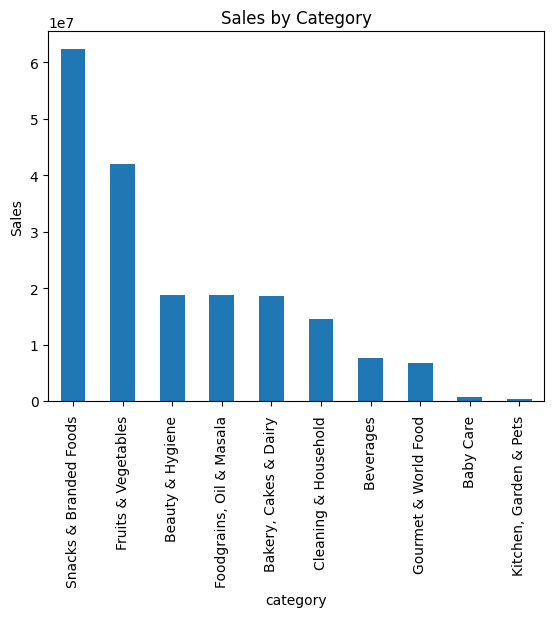

In [ ]:

sales_by_cat.plot(kind='bar', title='Sales by Category')
plt.ylabel('Sales')
plt.show()

# `Sales over time`

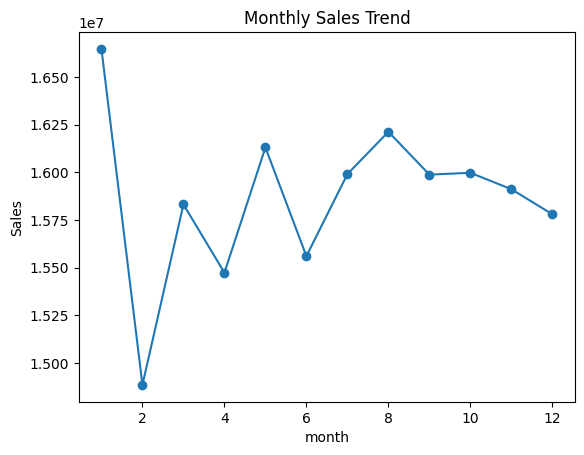

In [ ]:
# Sales over time
sales_month.plot(kind='line', marker='o', title='Monthly Sales Trend')
plt.ylabel('Sales')
plt.show()

# `Top 10 brands by sales`

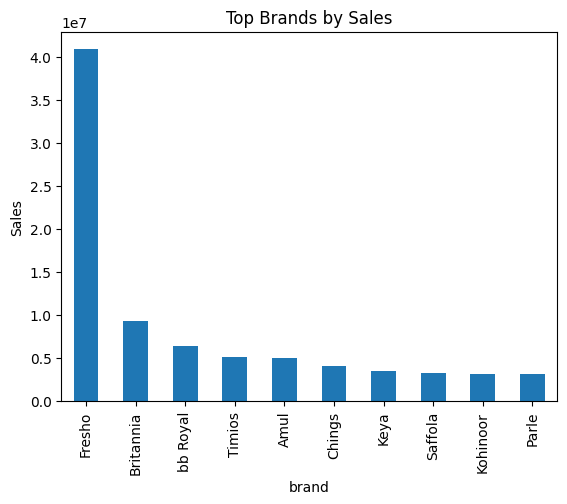

In [74]:
# Top brands
top_brands.plot(kind='bar', title='Top Brands by Sales')
plt.ylabel('Sales')
plt.show()

# `Sales by state`

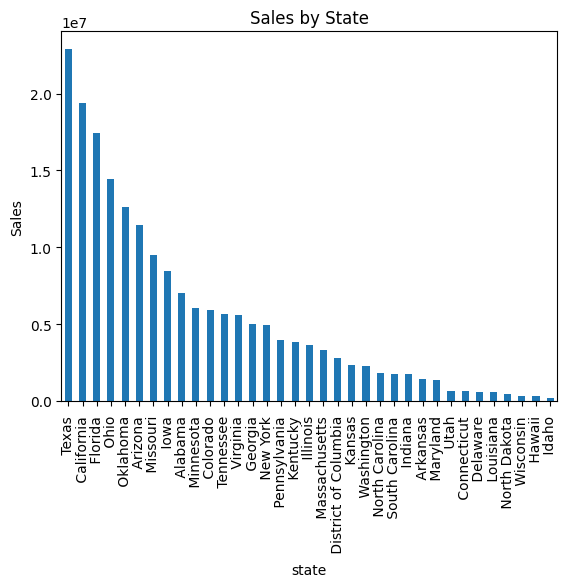

In [80]:
# Sales by state
sales_by_state.plot(kind='bar', title='Sales by State')
plt.ylabel('Sales')
plt.show()